In [137]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 
from pandas import DataFrame
import tensorflow as tf

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import category_encoders as ce

# Algorithms and models:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# Data categorization/encoding:

import category_encoders as ce 

In [138]:
train_df = pd.read_csv("sales_train.csv")
test_df = pd.read_csv("test.csv")

train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2   shop_id         int64  
 3   item_id         int64  
 4   item_price      float64
 5   item_cnt_day    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 134.4+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB


In [139]:
train_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [140]:
test_df.head()

#We need to create item_price and item_cnt_day for test_df. date_block_num will be 34

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [141]:
train_df['date']  =  pd.to_datetime(train_df['date'], format = '%d.%m.%Y')

In [142]:
# Let's check the missing values: There are no missing values

total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
item_cnt_day,0,0.0
item_price,0,0.0
item_id,0,0.0
shop_id,0,0.0
date_block_num,0,0.0


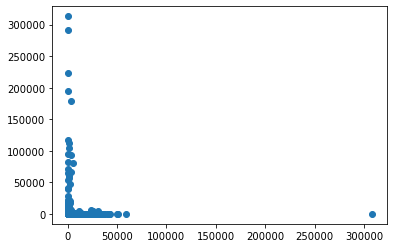

In [143]:
plt.scatter(train_df['item_price'].unique(),train_df.groupby(['item_price']).sum()['item_cnt_day'])

# there is one outlier, we remove it

In [144]:
train_df.drop(train_df[(train_df['item_price'] >200000)].index, inplace=True)

In [145]:
train_df[(train_df['item_price']<0)]

# Price cannot be <0, we remove this outlier too 

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
484683,2013-05-15,4,32,2973,-1.0,1.0


In [146]:
# Price cannot be <0, we remove this outlier too 

train_df.drop(train_df[train_df['item_price'] < 0].index, inplace = True)

# Sold items cannot be negative, we remove these outliers

train_df.drop(train_df[train_df['item_cnt_day'] < 0].index, inplace = True)

In [147]:
train_df[(train_df['item_cnt_day']<0)]

# We will assume that this negative numbers mean that somebody is returning products back
# So we will just leave them there

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
2,2013-01-05,0,25,2552,899.0,-1.0
148,2013-01-23,0,25,2321,999.0,-1.0
175,2013-01-07,0,25,2199,1449.0,-1.0
807,2013-01-02,0,25,2330,599.0,-1.0
1041,2013-01-13,0,25,5034,1989.0,-1.0
...,...,...,...,...,...,...
2934243,2015-10-26,33,25,3917,449.0,-1.0
2934462,2015-10-18,33,25,4896,6398.0,-1.0
2935263,2015-10-05,33,25,10039,249.0,-1.0
2935643,2015-10-16,33,25,7893,2990.0,-1.0


In [148]:
train_df.dtypes

date              datetime64[ns]
date_block_num             int64
shop_id                    int64
item_id                    int64
item_price               float64
item_cnt_day             float64
dtype: object

In [149]:
train_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,2015-10-10,33,25,7409,299.00,1.0
2935845,2015-10-09,33,25,7460,299.00,1.0
2935846,2015-10-14,33,25,7459,349.00,1.0
2935847,2015-10-22,33,25,7440,299.00,1.0


In [150]:
train_df.isna().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [151]:
train_df['year'] = train_df['date'].dt.year
train_df['month'] = train_df['date'].dt.month
train_df['day'] = train_df['date'].dt.day
train_df['year'] = train_df['year'].replace({2013:1,2014:2,2015:3})
items_df = pd.read_csv("items.csv")
train_df = pd.merge(train_df, items_df[['item_id','item_category_id']], how='left', on=['item_id'])

train_df


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,year,month,day,item_category_id
0,2013-01-02,0,59,22154,999.00,1.0,1,1,2,37
1,2013-01-03,0,25,2552,899.00,1.0,1,1,3,58
2,2013-01-05,0,25,2552,899.00,-1.0,1,1,5,58
3,2013-01-06,0,25,2554,1709.05,1.0,1,1,6,58
4,2013-01-15,0,25,2555,1099.00,1.0,1,1,15,56
...,...,...,...,...,...,...,...,...,...,...
2935842,2015-10-10,33,25,7409,299.00,1.0,3,10,10,55
2935843,2015-10-09,33,25,7460,299.00,1.0,3,10,9,55
2935844,2015-10-14,33,25,7459,349.00,1.0,3,10,14,55
2935845,2015-10-22,33,25,7440,299.00,1.0,3,10,22,57


In [152]:
train_df = train_df[['date','year','month','day','date_block_num','shop_id','item_id','item_price','item_category_id','item_cnt_day']]

In [156]:
train_df.dtypes

date                datetime64[ns]
year                         int64
month                        int64
day                          int64
date_block_num               int64
shop_id                      int64
item_id                      int64
item_price                 float64
item_category_id             int64
item_cnt_day               float64
dtype: object

In [157]:

# "Shop_id" is an integer number, but actually it is just a label. We should encode it in a more logical way.
# For this we are going to encode it based on the item_price:

encoder=ce.TargetEncoder(cols='shop_id') 
train_df['shop_id'] = encoder.fit_transform(train_df['shop_id'],train_df['item_price'])

/home/miguel/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/miguel/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [158]:
# Same thing for the item_id:

encoder=ce.TargetEncoder(cols='item_id') 
train_df['item_id'] = encoder.fit_transform(train_df['item_id'],train_df['item_price'])
train_df

/home/miguel/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):
/home/miguel/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,year,month,day,date_block_num,shop_id,item_id,item_price,item_category_id,item_cnt_day
0,2013-01-02,1,1,2,0,883.529971,702.932203,999.00,37,1.0
1,2013-01-03,1,1,3,0,834.664881,941.727342,899.00,58,1.0
3,2013-01-06,1,1,6,0,834.664881,889.361888,1709.05,58,1.0
4,2013-01-15,1,1,15,0,834.664881,1123.101786,1099.00,56,1.0
5,2013-01-10,1,1,10,0,834.664881,340.152174,349.00,59,1.0
...,...,...,...,...,...,...,...,...,...,...
2935842,2015-10-10,3,10,10,33,834.664881,295.482420,299.00,55,1.0
2935843,2015-10-09,3,10,9,33,834.664881,294.259145,299.00,55,1.0
2935844,2015-10-14,3,10,14,33,834.664881,303.724153,349.00,55,1.0
2935845,2015-10-22,3,10,22,33,834.664881,291.652174,299.00,57,1.0


In [159]:
# Train_df seems to be ready. Let's work with test_df:
# We need to add "year", "month", "date_block_num" and "item_price" for it to be consistent with the features from "train_df".
# "Year" is clear (2015), month is clear (11), "date_block_num" is clear (34).

test_df.insert(0,'year',2015,True)
test_df.insert(1,'month',11,True)
test_df.insert(2,'date_block_num',34,True)
test_df.drop(['ID'], axis=1, inplace=True)
test_df

,year,month,date_block_num,shop_id,item_id
0,2015,11,34,5,5037
1,2015,11,34,5,5320
2,2015,11,34,5,5233
3,2015,11,34,5,5232
4,2015,11,34,5,5268
...,...,...,...,...,...
214195,2015,11,34,45,18454
214196,2015,11,34,45,16188
214197,2015,11,34,45,15757
214198,2015,11,34,45,19648


In [160]:
# We add the last item_price of this item_id and shop_id

In [161]:

# For "item_price" we will start by adding the last price of the "item_id". It will not fill all the rows, but at least part of it:

item_price=dict(train_df.groupby('item_id')['item_price'].last('1D').reset_index().values)
test_df['item_price']=test_df['item_id'].map(item_price)
test_df

,year,month,date_block_num,shop_id,item_id,item_price
0,2015,11,34,5,5037,NaN
1,2015,11,34,5,5320,NaN
2,2015,11,34,5,5233,NaN
3,2015,11,34,5,5232,NaN
4,2015,11,34,5,5268,NaN
...,...,...,...,...,...,...
214195,2015,11,34,45,18454,NaN
214196,2015,11,34,45,16188,NaN
214197,2015,11,34,45,15757,NaN
214198,2015,11,34,45,19648,NaN


In [162]:
# There are still NaN values that we will average. For this, we can set the item_price with the price of this item in other shops

test_df['item_price'].fillna(train_df.groupby(['item_id']).mean()['item_price'],inplace=True)
test_df

,year,month,date_block_num,shop_id,item_id,item_price
0,2015,11,34,5,5037,NaN
1,2015,11,34,5,5320,NaN
2,2015,11,34,5,5233,NaN
3,2015,11,34,5,5232,NaN
4,2015,11,34,5,5268,NaN
...,...,...,...,...,...,...
214195,2015,11,34,45,18454,NaN
214196,2015,11,34,45,16188,NaN
214197,2015,11,34,45,15757,NaN
214198,2015,11,34,45,19648,NaN


In [163]:
train_df.isna().sum()

date                0
year                0
month               0
day                 0
date_block_num      0
shop_id             0
item_id             0
item_price          0
item_category_id    0
item_cnt_day        0
dtype: int64

In [164]:
test_df.isna().sum()



year                   0
month                  0
date_block_num         0
shop_id                0
item_id                0
item_price        213485
dtype: int64

In [165]:
# There are still nan values in the price from "test_df", corresponding to items that whether are new or have been never sold. 
# We can fill these NaN values with the average of the products from his category. For this:

# 1) We first read the items.csv file

items_df = pd.read_csv("items.csv")
items_df

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [166]:
# 2) We add the category to each item from the test:

test_df = pd.merge(test_df, items_df[['item_id','item_category_id']], how='left', on=['item_id'])
test_df

,year,month,date_block_num,shop_id,item_id,item_price,item_category_id
0,2015,11,34,5,5037,NaN,19
1,2015,11,34,5,5320,NaN,55
2,2015,11,34,5,5233,NaN,19
3,2015,11,34,5,5232,NaN,23
4,2015,11,34,5,5268,NaN,20
...,...,...,...,...,...,...,...
214195,2015,11,34,45,18454,NaN,55
214196,2015,11,34,45,16188,NaN,64
214197,2015,11,34,45,15757,NaN,55
214198,2015,11,34,45,19648,NaN,40


In [167]:
# We average the price of every category in a new dataframe:

category_prices_df = train_df[['item_category_id','item_price']].groupby(['item_category_id']).mean().reset_index()
category_prices_df

,item_category_id,item_price
0,0,87.800000
1,1,215.500000
2,2,2255.981900
3,3,2105.419083
4,4,555.057055
...,...,...
79,79,1094.625747
80,80,1246.023391
81,81,189.037783
82,82,32.481014


In [168]:
# And we merge it with the NaN values from "test_df"

test_df = pd.merge(test_df, category_prices_df, how='left', on=['item_category_id'])
test_df['item_price_x'].fillna(test_df['item_price_y'], inplace=True)
test_df.drop('item_price_y', axis=1, inplace=True)
test_df=test_df.rename(columns = {'item_price_x':'item_price'})
test_df['year']=3
test_df

,year,month,date_block_num,shop_id,item_id,item_price,item_category_id
0,3,11,34,5,5037,1511.455229,19
1,3,11,34,5,5320,286.182966,55
2,3,11,34,5,5233,1511.455229,19
3,3,11,34,5,5232,1478.640971,23
4,3,11,34,5,5268,2791.342316,20
...,...,...,...,...,...,...,...
214195,3,11,34,45,18454,286.182966,55
214196,3,11,34,45,16188,1028.948188,64
214197,3,11,34,45,15757,286.182966,55
214198,3,11,34,45,19648,256.342035,40


In [169]:
# Finally we confirm that there are no NaN values anymore in test_df

test_df.isna().sum()

year                0
month               0
date_block_num      0
shop_id             0
item_id             0
item_price          0
item_category_id    0
dtype: int64

In [170]:
train_df

,date,year,month,day,date_block_num,shop_id,item_id,item_price,item_category_id,item_cnt_day
0,2013-01-02,1,1,2,0,883.529971,702.932203,999.00,37,1.0
1,2013-01-03,1,1,3,0,834.664881,941.727342,899.00,58,1.0
3,2013-01-06,1,1,6,0,834.664881,889.361888,1709.05,58,1.0
4,2013-01-15,1,1,15,0,834.664881,1123.101786,1099.00,56,1.0
5,2013-01-10,1,1,10,0,834.664881,340.152174,349.00,59,1.0
...,...,...,...,...,...,...,...,...,...,...
2935842,2015-10-10,3,10,10,33,834.664881,295.482420,299.00,55,1.0
2935843,2015-10-09,3,10,9,33,834.664881,294.259145,299.00,55,1.0
2935844,2015-10-14,3,10,14,33,834.664881,303.724153,349.00,55,1.0
2935845,2015-10-22,3,10,22,33,834.664881,291.652174,299.00,57,1.0


In [171]:
test_df

,year,month,date_block_num,shop_id,item_id,item_price,item_category_id
0,3,11,34,5,5037,1511.455229,19
1,3,11,34,5,5320,286.182966,55
2,3,11,34,5,5233,1511.455229,19
3,3,11,34,5,5232,1478.640971,23
4,3,11,34,5,5268,2791.342316,20
...,...,...,...,...,...,...,...
214195,3,11,34,45,18454,286.182966,55
214196,3,11,34,45,16188,1028.948188,64
214197,3,11,34,45,15757,286.182966,55
214198,3,11,34,45,19648,256.342035,40


In [172]:
# the feature "shop_id" needs to be encoded yet, to be consistent with "train_df"

encoder=ce.TargetEncoder(cols='shop_id')
test_df['shop_id'] = encoder.fit_transform(test_df['shop_id'],test_df['item_price'])
test_df

/home/miguel/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,year,month,date_block_num,shop_id,item_id,item_price,item_category_id
0,3,11,34,899.071148,5037,1511.455229,19
1,3,11,34,899.071148,5320,286.182966,55
2,3,11,34,899.071148,5233,1511.455229,19
3,3,11,34,899.071148,5232,1478.640971,23
4,3,11,34,899.071148,5268,2791.342316,20
...,...,...,...,...,...,...,...
214195,3,11,34,904.692294,18454,286.182966,55
214196,3,11,34,904.692294,16188,1028.948188,64
214197,3,11,34,904.692294,15757,286.182966,55
214198,3,11,34,904.692294,19648,256.342035,40


In [173]:
# Same thing for "item_id":

encoder=ce.TargetEncoder(cols='item_id')
test_df['item_id'] = encoder.fit_transform(test_df['item_id'],test_df['item_price'])
test_df

/home/miguel/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,year,month,date_block_num,shop_id,item_id,item_price,item_category_id
0,3,11,34,899.071148,1511.455229,1511.455229,19
1,3,11,34,899.071148,286.182966,286.182966,55
2,3,11,34,899.071148,1511.455229,1511.455229,19
3,3,11,34,899.071148,1478.640971,1478.640971,23
4,3,11,34,899.071148,2791.342316,2791.342316,20
...,...,...,...,...,...,...,...
214195,3,11,34,904.692294,286.182966,286.182966,55
214196,3,11,34,904.692294,1028.948188,1028.948188,64
214197,3,11,34,904.692294,286.182966,286.182966,55
214198,3,11,34,904.692294,256.342035,256.342035,40


In [174]:
train_df

,date,year,month,day,date_block_num,shop_id,item_id,item_price,item_category_id,item_cnt_day
0,2013-01-02,1,1,2,0,883.529971,702.932203,999.00,37,1.0
1,2013-01-03,1,1,3,0,834.664881,941.727342,899.00,58,1.0
3,2013-01-06,1,1,6,0,834.664881,889.361888,1709.05,58,1.0
4,2013-01-15,1,1,15,0,834.664881,1123.101786,1099.00,56,1.0
5,2013-01-10,1,1,10,0,834.664881,340.152174,349.00,59,1.0
...,...,...,...,...,...,...,...,...,...,...
2935842,2015-10-10,3,10,10,33,834.664881,295.482420,299.00,55,1.0
2935843,2015-10-09,3,10,9,33,834.664881,294.259145,299.00,55,1.0
2935844,2015-10-14,3,10,14,33,834.664881,303.724153,349.00,55,1.0
2935845,2015-10-22,3,10,22,33,834.664881,291.652174,299.00,57,1.0


In [175]:
X = train_df.drop(['date','day','item_cnt_day'], axis=1)

# The target values from "train_df" are too broad. We will normalize it using log:

y = np.log(train_df['item_cnt_day'])
y = y.fillna(y.median())



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)



In [176]:
# HYPERPARAMETER OPTIMIZATION FOR XGBOOST:

# Hyperparameters I tried with cross validation by means of XGBRegressor:

# 'max_depth': [4,6,10],
# 'learning_rate': [0.01, 0.1, 1],
# 'n_estimators': [600, 1500, 2000],
# 'colsample_bytree': [0.5,0.7,1],
# 'tree_method': ['gpu_hist'],
# 'alpha': [0,0.01,0.1],
# 'gamma': [0, 0.1, 0.5],
# 'eta': [0.01,0.1,0.2],
# 'min_child_weight': [1,2,6]


# The best hyperparameters turned out to be: Best parameters: {'alpha': 0, 'colsample_bytree': 0.5, 'eta': 0.01, 'gamma': 0.1, 
# 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 1500, 'tree_method': 'gpu_hist'}


import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

params = { 'max_depth': [4],
           'learning_rate': [0.1],
           'n_estimators': [1500],
           'colsample_bytree': [0.5],
           'tree_method': ['gpu_hist'],
           'alpha': [0],
           'gamma': [0.1],
           'eta': [0.01],
           'min_child_weight': [1]
            }
xgbr = xgb.XGBRegressor(seed = 20)
clf = GridSearchCV(estimator=xgbr, 
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=3)
clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] alpha=0, colsample_bytree=0.5, eta=0.01, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1500, tree_method=gpu_hist 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=0, colsample_bytree=0.5, eta=0.01, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1500, tree_method=gpu_hist, score=-0.079, total=  58.4s
[CV] alpha=0, colsample_bytree=0.5, eta=0.01, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1500, tree_method=gpu_hist 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.4s remaining:    0.0s


[CV]  alpha=0, colsample_bytree=0.5, eta=0.01, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1500, tree_method=gpu_hist, score=-0.096, total=  55.4s
[CV] alpha=0, colsample_bytree=0.5, eta=0.01, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1500, tree_method=gpu_hist 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.9min remaining:    0.0s


[CV]  alpha=0, colsample_bytree=0.5, eta=0.01, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1500, tree_method=gpu_hist, score=-0.080, total=  52.7s
[CV] alpha=0, colsample_bytree=0.5, eta=0.01, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1500, tree_method=gpu_hist 
[CV]  alpha=0, colsample_bytree=0.5, eta=0.01, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1500, tree_method=gpu_hist, score=-0.093, total=  55.1s
[CV] alpha=0, colsample_bytree=0.5, eta=0.01, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1500, tree_method=gpu_hist 
[CV]  alpha=0, colsample_bytree=0.5, eta=0.01, gamma=0.1, learning_rate=0.1, max_depth=4, min_child_weight=1, n_estimators=1500, tree_method=gpu_hist, score=-0.087, total= 1.0min


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  4.7min finished


Best parameters: {'alpha': 0, 'colsample_bytree': 0.5, 'eta': 0.01, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 1500, 'tree_method': 'gpu_hist'}
Lowest RMSE:  0.2946685995050872


In [177]:
results_df = clf.predict(test_df)

# We undo the normalized results by means of the log:

results_df = pow(10, results_df)

df = pd.DataFrame(data=results_df, columns=["item_cnt_month"])
df['ID'] = np.arange(len(df))
df.to_csv('final_file', sep=',', index=False, index_label=False )